In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
import torch
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from collections import Counter
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report
from Scripts.Configs.ConfigClass import Config
from torch_geometric.data import Data
from torch_geometric.utils import to_networkx
import networkx as nx
from torch.utils.data import TensorDataset, DataLoader
from torch.utils.data.dataset import random_split, T_co
from torch_geometric.data.lightning import LightningDataset
import pdb
import lightning as L
import time
from Scripts.DataManager.GraphConstructor.CoOccurrenceGraphConstructor import CoOccurrenceGraphConstructor
from Scripts.DataManager.GraphLoader.GLabeledGraphLoader import GLabeledGraphLoader

stop_words = set(stopwords.words('english'))
stemmer = SnowballStemmer('english')
config = Config(r'C:\Users\fardin\Projects\ColorIntelligence\Scripts\Configs\Config.json')

C:\Users\fardin\AppData\Local\Programs\Python\Python310\lib\site-packages\torchaudio\backend\utils.py:74: UserWarning: No audio backend is available.
  warnings.warn("No audio backend is available.")


In [2]:
train_df = pd.read_csv(r'C:\Users\fardin\Projects\ColorIntelligence\data\Amazon-Review\train_sm.csv')
test_df = pd.read_csv(r'C:\Users\fardin\Projects\ColorIntelligence\data\Amazon-Review\test_sm.csv')
train_df.columns = ['Polarity', 'Title', 'Review']
test_df.columns = ['Polarity', 'Title', 'Review']
train_df = train_df[['Polarity', 'Review']]
test_df = test_df[['Polarity', 'Review']]

In [3]:
config = Config(r'C:\Users\fardin\Projects\ColorIntelligence\Scripts\Configs\Config.json')

execution time in second: 0.010978937149047852


AttributeError: 'CoOccurrenceGraphConstructor' object has no attribute 'unique_words'

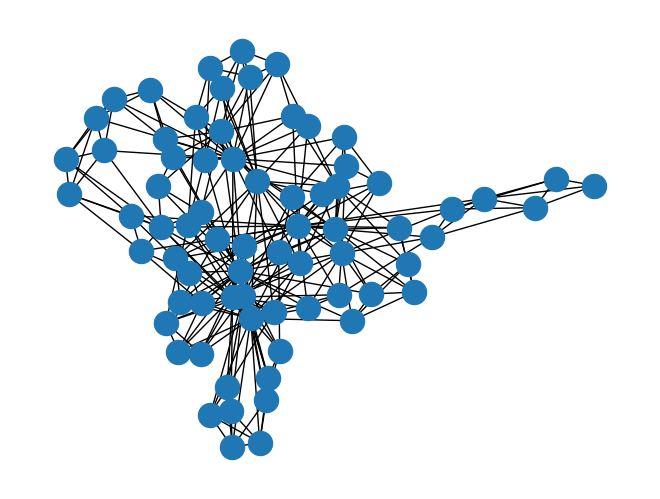

In [4]:
start_time = time.time()
graph_const = CoOccurrenceGraphConstructor(train_df['Review'], 'AmazonReview', config, lazy_construction=True,  load_preprocessed_data=True, naming_prepend='graph')
print(f'execution time in second: {time.time() - start_time}')
# graph_const = CoOccurrenceGraphConstructor(train_df['Review'][:10], 'AmazonReview', config, lazy_construction=False, naming_prepend='graph', load_preprocessed_data=False)
# graph = graph_const.to_graph(train_df['Review'][0])
graph_const.draw_graph(0)

In [6]:
graph_loader = GLabeledGraphLoader(graph_const, torch.tensor(test_df['Polarity'][:10]),3, 'cpu')

C:\Users\fardin\AppData\Local\Programs\Python\Python310\lib\site-packages\torch_geometric\deprecation.py:22: UserWarning: 'data.DataListLoader' is deprecated, use 'loader.DataListLoader' instead
  warnings.warn(out)


[(Data(x=[108, 300], edge_index=[2, 896], edge_attr=[896]), tensor(1)),
 (Data(x=[71, 300], edge_index=[2, 582], edge_attr=[582]), tensor(2)),
 (Data(x=[63, 300], edge_index=[2, 546], edge_attr=[546]), tensor(1))]